In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CarPrice_Assignment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [48]:
df.describe(include = 'all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [49]:
df_qual = df.select_dtypes(include = 'object')

In [50]:
# Define possible typos in categorical columns

for col in df_qual.columns:
    if len(df_qual[col].value_counts()) > 10:
        print(f'Unique values in {col} are: {df_qual[col].unique()}')
    else:
        print(df_qual[col].value_counts())

Unique values in CarName are: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'bui

In [51]:
# Replace some values and normalizing CarName column
to_be_replaced = ['audi 100 ls', 'volvo 145e (sw)', 'volkswagen 411 (sw)', 'toyota corolla 1600 (sw)', 'audi 5000s (diesel)', 'dodge coronet custom (sw)', 'maxda rx3', 'maxda glc deluxe', 'peugeot 504 (sw)', 'porcshce panamera', 'toyouta tercel', 'vokswagen rabbit', 'vw dasher', 'vw rabbit', 'volvo diesel']
to_replace = ['audi 100ls', 'volvo 145e','volkswagen 411', 'toyota corolla 1600', 'audi 5000s', 'dodge coronet custom', 'mazda rx3', 'mazda glc deluxe', 'peugeot 504', 'porsche panamera', 'toyota tercel', 'volkswagen rabbit', 'volkswagen dasher', 'volkswagen rabbit', 'volvo']

df['CarName'] = df['CarName'].replace(to_be_replaced, to_replace)
df['CarName'] = df['CarName'].str.capitalize()


In [61]:
# Transform categorical columns in numercial
df['DieselFuel?'] = np.where(df['fueltype'] == 'diesel', 1, 0)
df['TurboAspiration?'] = np.where(df['aspiration'] == 'turbo', 1, 0)
df['FrontEngine?'] = np.where(df['enginelocation'] == 'front', 1, 0)

df['Sedan?'] = np.where(df['carbody'] == 'sedan', 1, 0)
df['Hatchback?'] = np.where(df['carbody'] == 'hatchback', 1, 0)
df['Wagon?'] = np.where(df['carbody'] == 'wagon', 1, 0)
df['Hardtop?'] = np.where(df['carbody'] == 'hardtop', 1, 0)
df['Convertible?'] = np.where(df['carbody'] == 'convertible', 1, 0)

df['FDriveWheel?'] = np.where(df['drivewheel'] == 'fwd', 1, 0)
df['RDriveWheel?'] = np.where(df['drivewheel'] == 'rwd', 1, 0)
df['4DriveWheel?'] = np.where(df['drivewheel'] == '4wd', 1, 0)

df['EngTypeSOHC?'] = np.where(df['enginetype'].isin(['ohc', 'ohcf', 'ohcv']), 1, 0)
df['EngTypeDOHC?'] = np.where(df['enginetype'].isin(['dohc', 'dohcv']), 1, 0)
df['EngTypeOther?'] = np.where(df['enginetype'].isin(['rotor', 'l']), 1, 0)

df['FuelInjSystem?'] = np.where(df['fuelsystem'].isin(['mpfi', 'spfi', 'mfi']), 1, 0)
df['CarburetorSystem?'] = np.where(df['fuelsystem'].isin(['1bbl', '2bbl', '4bbl']), 1, 0)
df['DieselSystem?'] = np.where(df['fuelsystem'].isin(['idi', 'spdi']), 1, 0)


doors_condition = [df['doornumber'] == 'two', df['doornumber'] == 'four']
doors_values = [2, 4]
df['Doors'] = np.select(doors_condition, doors_values)

cylinder_condition = [df['cylindernumber'] == 'two', df['cylindernumber'] == 'three', df['cylindernumber'] == 'four', df['cylindernumber'] == 'five', df['cylindernumber'] == 'six', df['cylindernumber'] == 'eight', df['cylindernumber'] == 'twelve']
cylinder_values = [2, 3, 4, 5, 6, 8, 12]
df['Cylinders'] = np.select(cylinder_condition, cylinder_values)

In [62]:
df_corr = df.select_dtypes(exclude = 'object')
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_ID             205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   wheelbase          205 non-null    float64
 3   carlength          205 non-null    float64
 4   carwidth           205 non-null    float64
 5   carheight          205 non-null    float64
 6   curbweight         205 non-null    int64  
 7   enginesize         205 non-null    int64  
 8   boreratio          205 non-null    float64
 9   stroke             205 non-null    float64
 10  compressionratio   205 non-null    float64
 11  horsepower         205 non-null    int64  
 12  peakrpm            205 non-null    int64  
 13  citympg            205 non-null    int64  
 14  highwaympg         205 non-null    int64  
 15  price              205 non-null    float64
 16  DieselFuel?        205 non

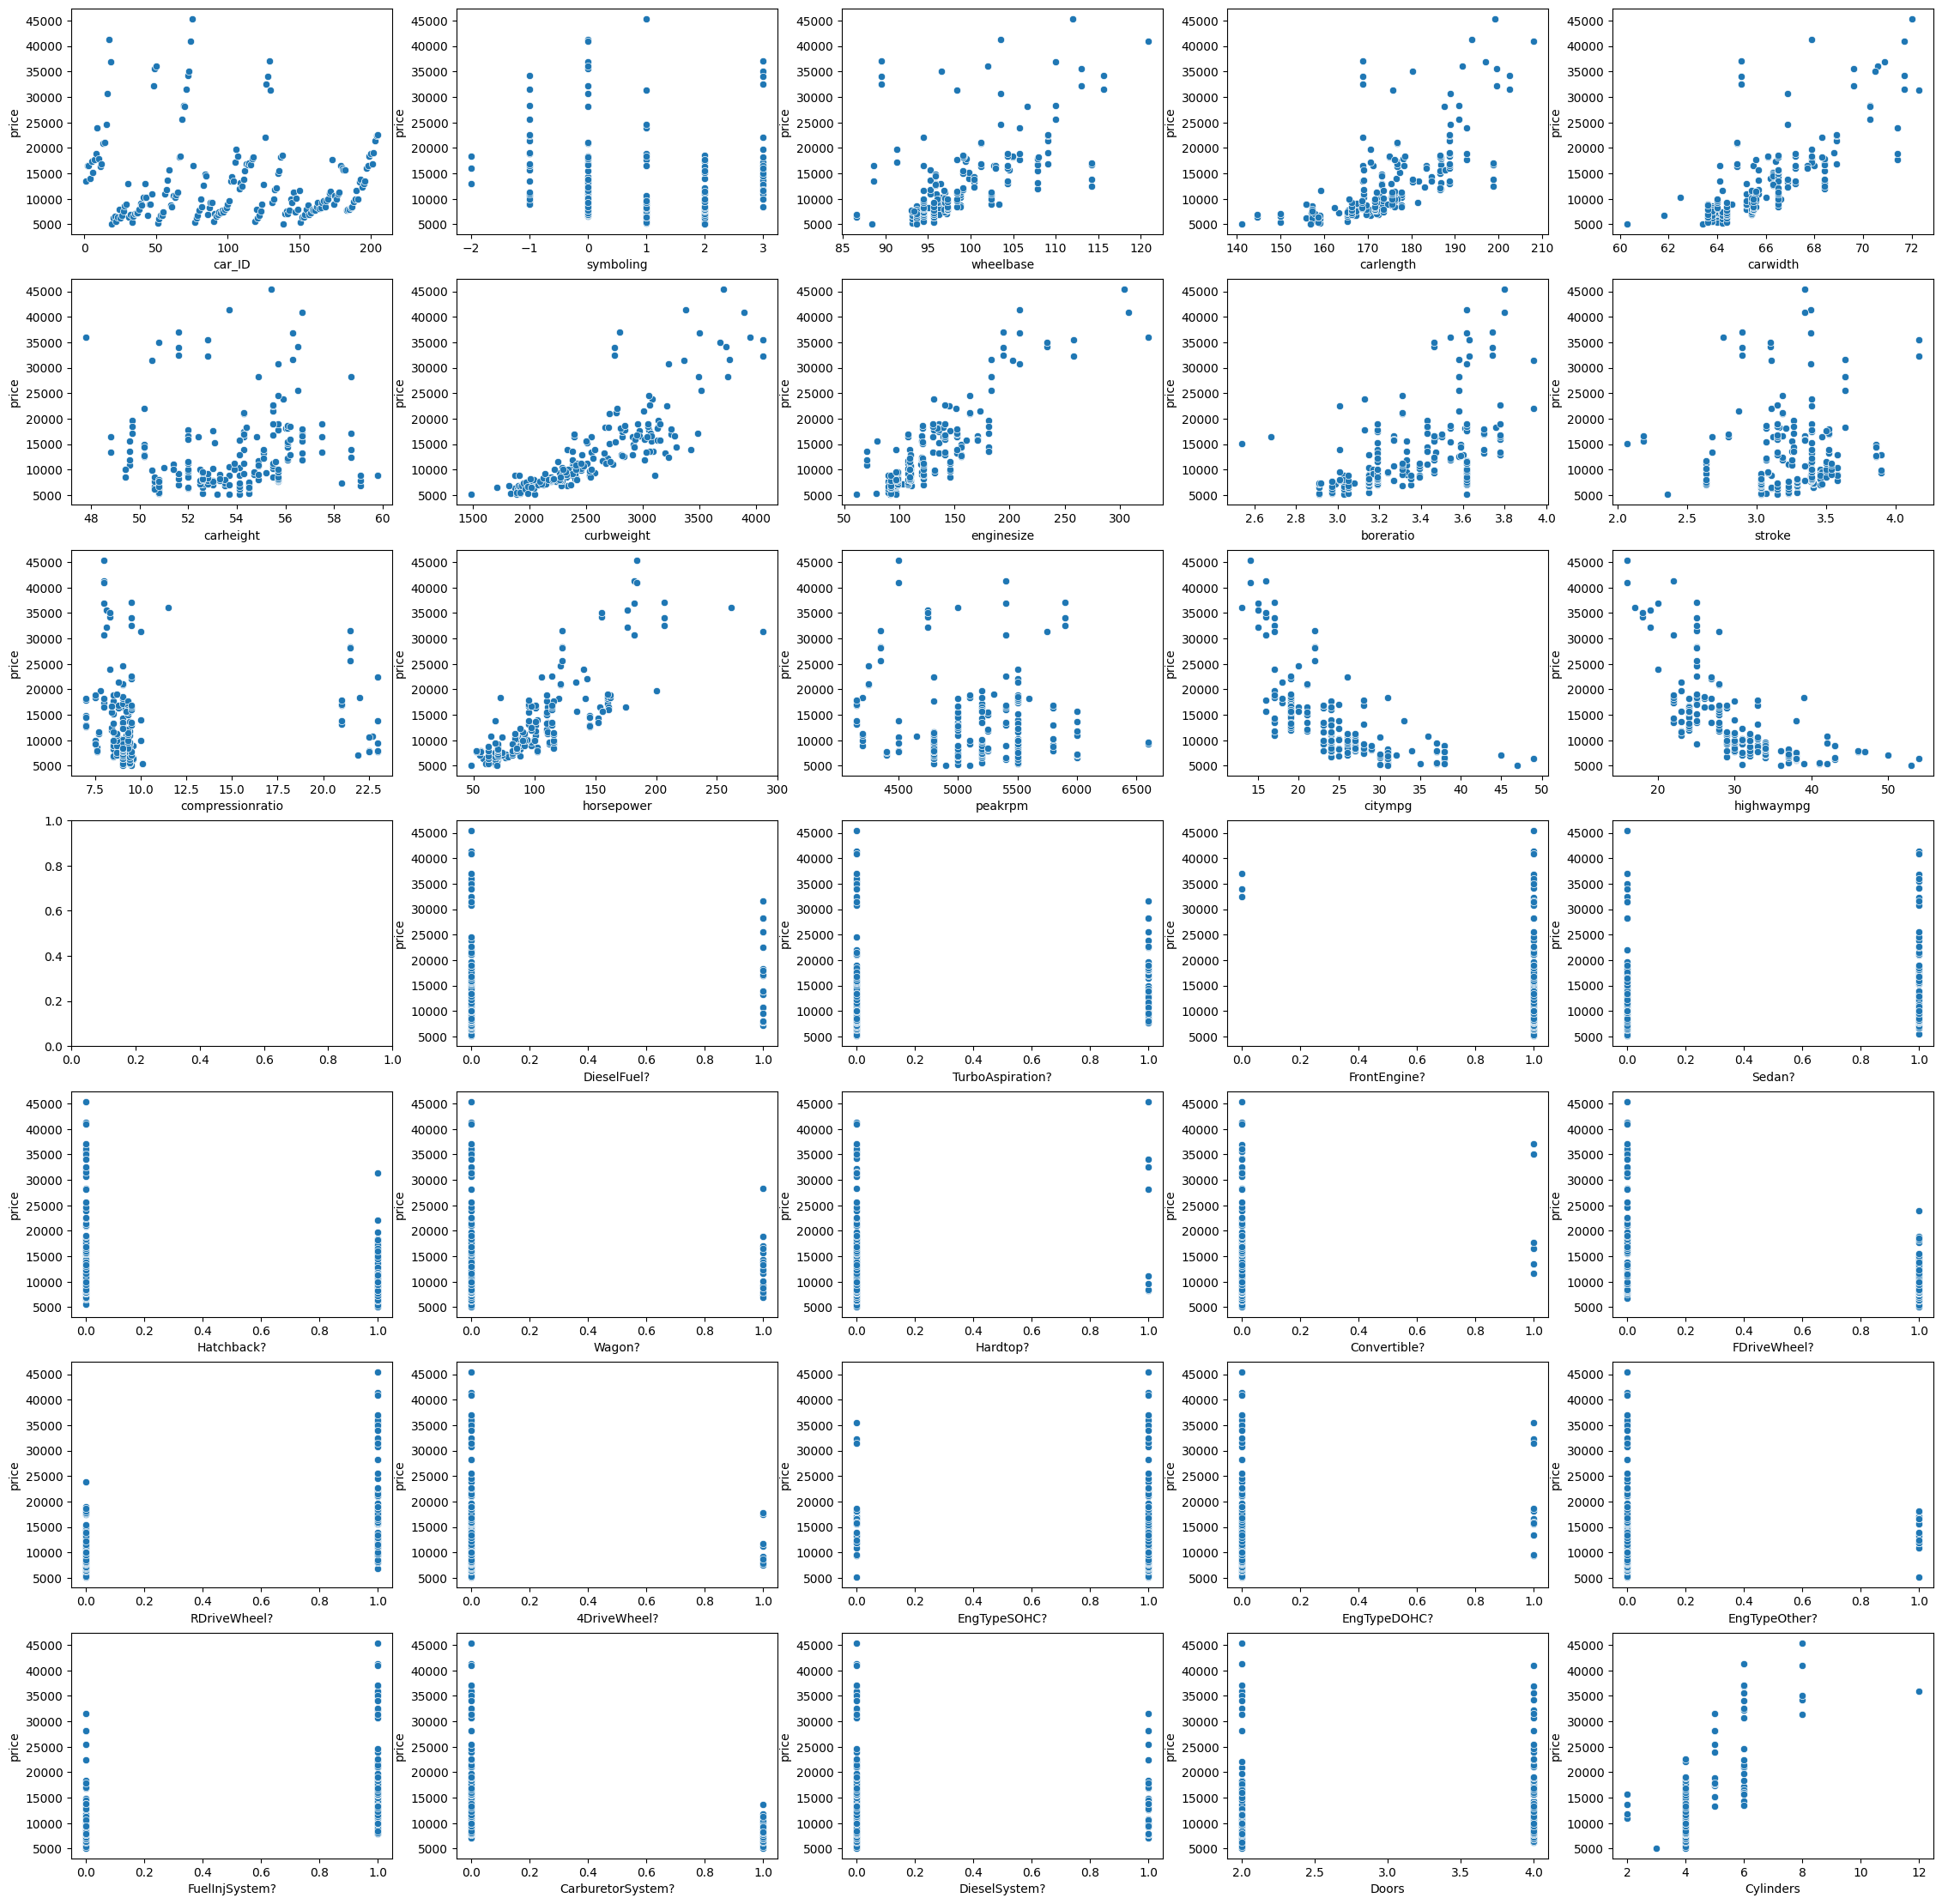

In [63]:
fig, axes = plt.subplots(7, 5, figsize = (28,28))
target = 'price'

for idx, col in enumerate(df_corr):
    if col != target:
        sns.scatterplot(df, x = col, y = target, ax = axes[idx // 5, idx % 5])

<Axes: >

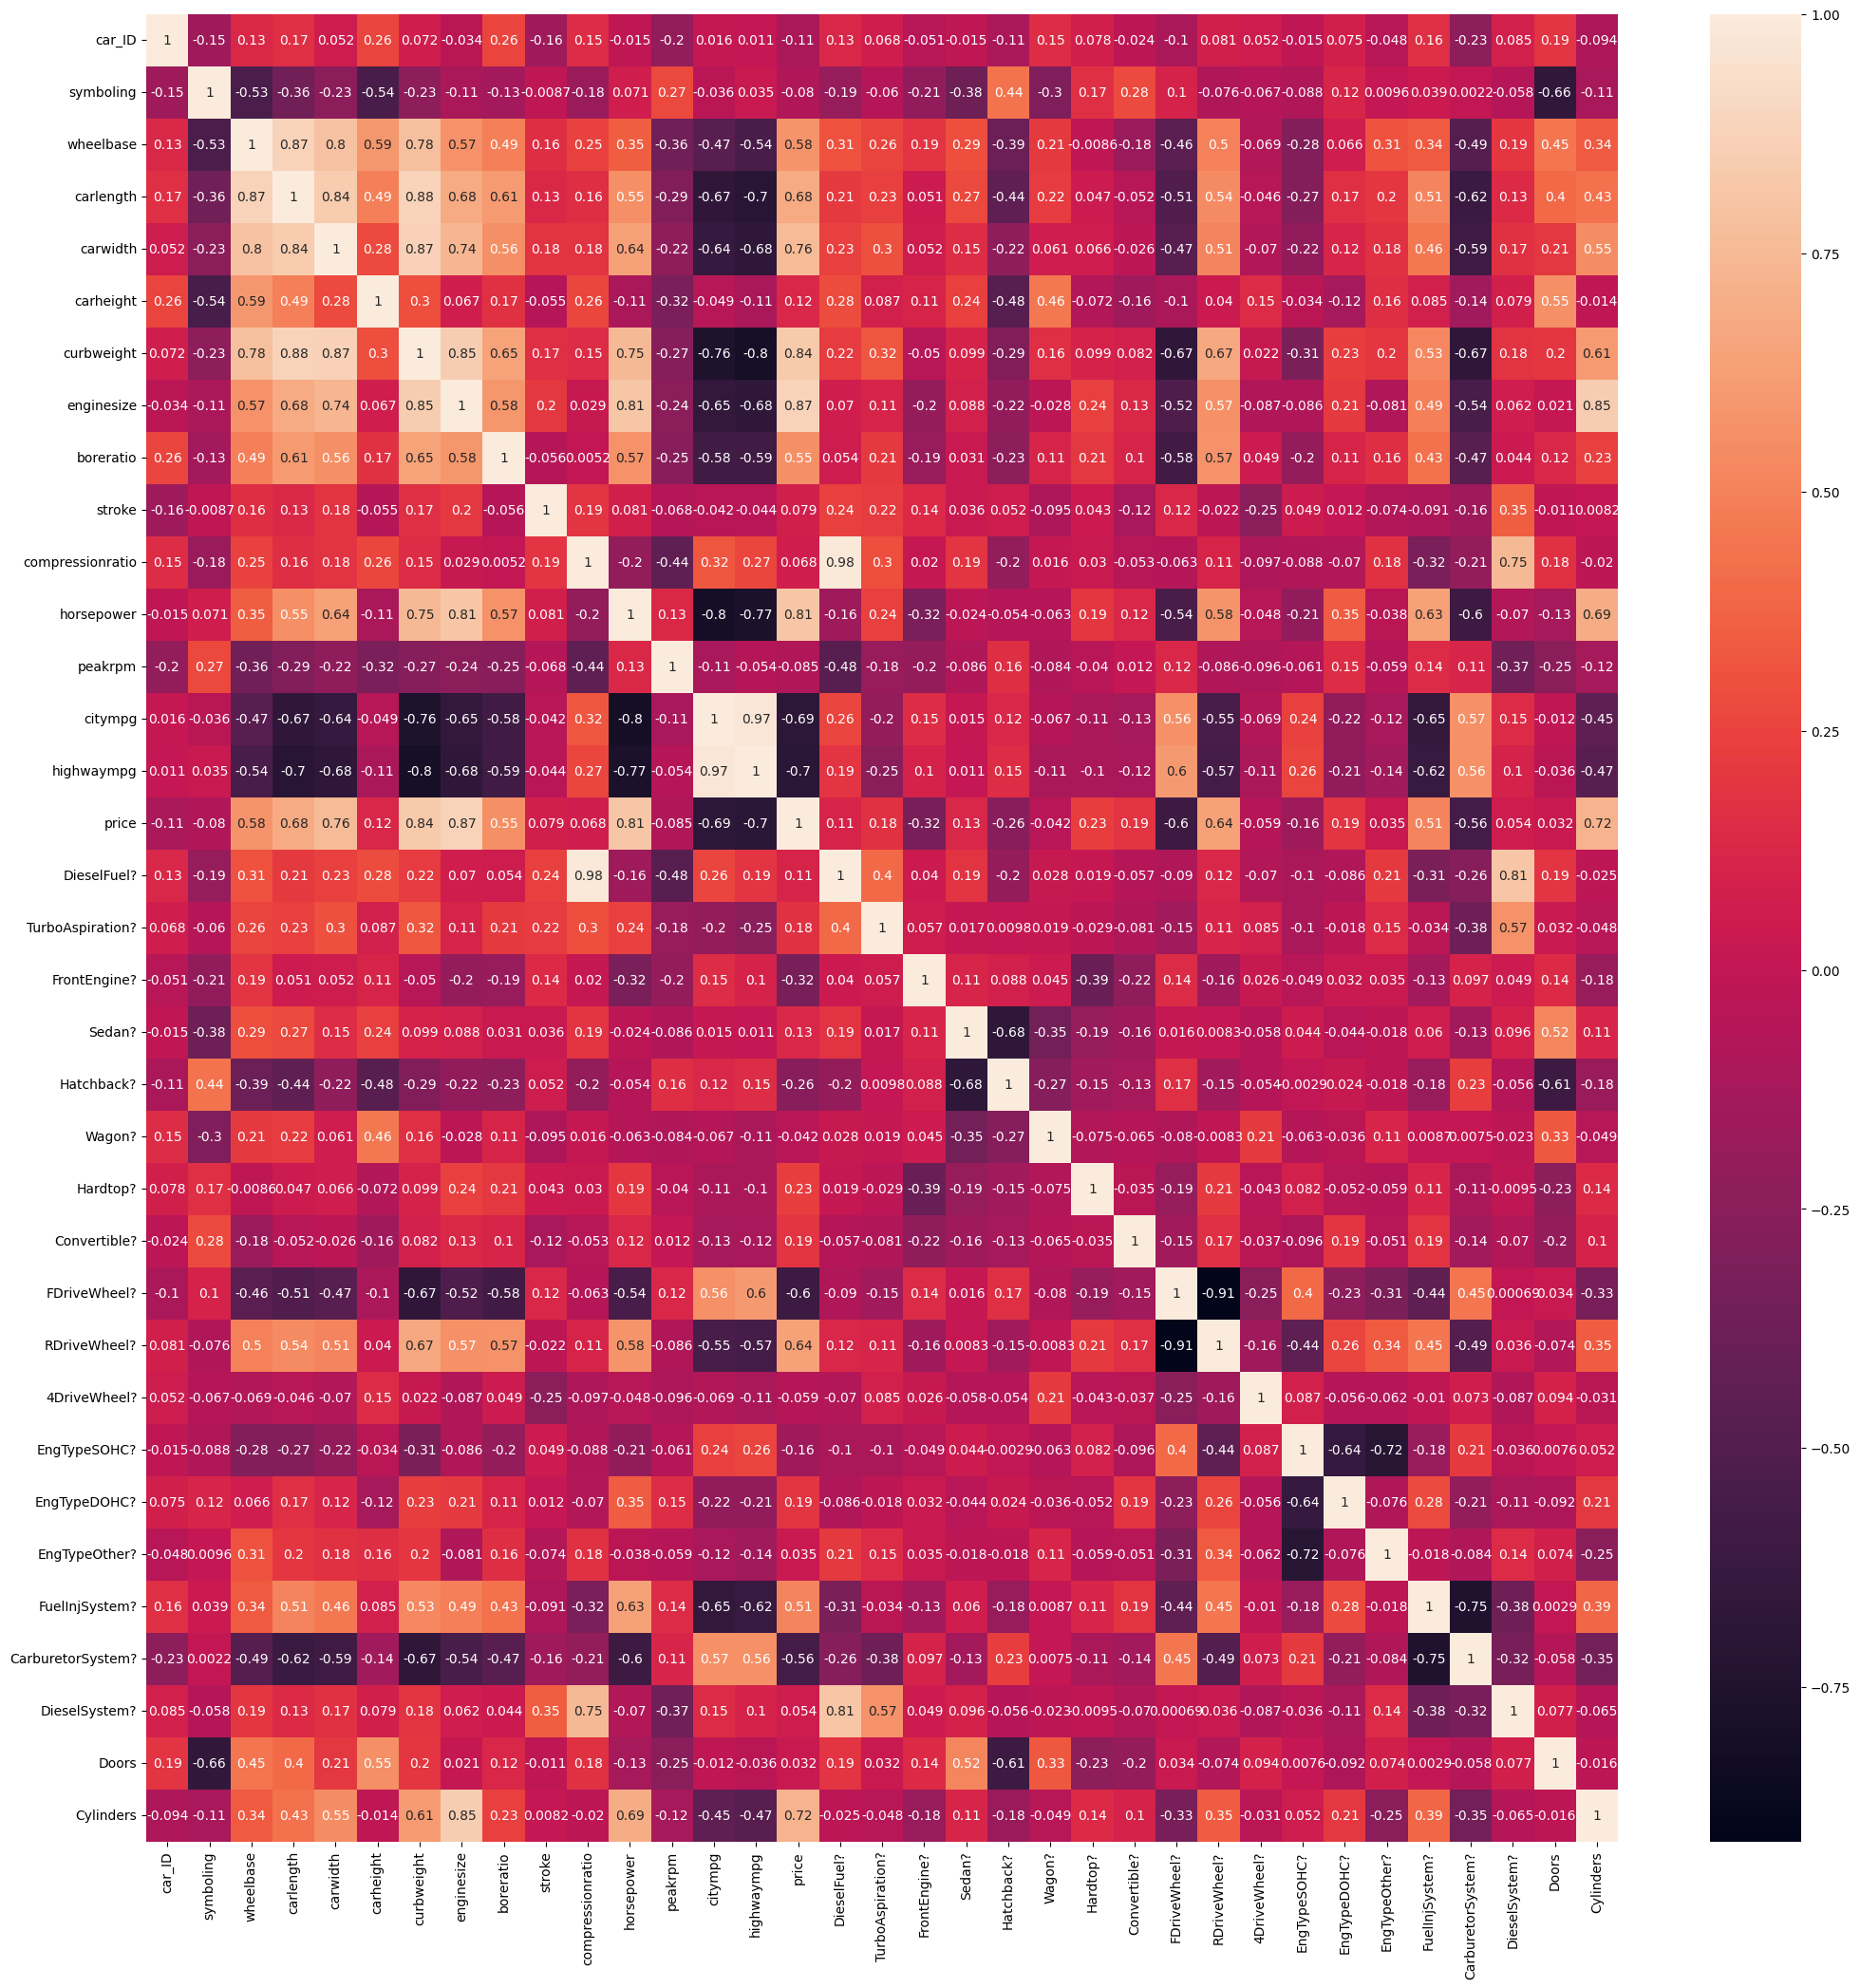

In [66]:
corr_model = df_corr.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr_model, annot = True)

In [68]:
corr_model['price'].sort_values()

highwaympg          -0.697599
citympg             -0.685751
FDriveWheel?        -0.601950
CarburetorSystem?   -0.563450
FrontEngine?        -0.324973
Hatchback?          -0.262039
EngTypeSOHC?        -0.160506
car_ID              -0.109093
peakrpm             -0.085267
symboling           -0.079978
4DriveWheel?        -0.058866
Wagon?              -0.042310
Doors                0.031835
EngTypeOther?        0.034647
DieselSystem?        0.053838
compressionratio     0.067984
stroke               0.079443
DieselFuel?          0.105679
carheight            0.119336
Sedan?               0.125716
TurboAspiration?     0.177926
Convertible?         0.187681
EngTypeDOHC?         0.191387
Hardtop?             0.225854
FuelInjSystem?       0.513216
boreratio            0.553173
wheelbase            0.577816
RDriveWheel?         0.638957
carlength            0.682920
Cylinders            0.718305
carwidth             0.759325
horsepower           0.808139
curbweight           0.835305
enginesize

In [90]:
# After consideration of all variables were decided combine some of them which has
df['CarSpace'] = df['carwidth'] * df['carlength']
df['AvgMpg'] = (df['highwaympg'] + df['citympg']) / 2

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_ID             205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   CarName            205 non-null    object 
 3   fueltype           205 non-null    object 
 4   aspiration         205 non-null    object 
 5   doornumber         205 non-null    object 
 6   carbody            205 non-null    object 
 7   drivewheel         205 non-null    object 
 8   enginelocation     205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  carlength          205 non-null    float64
 11  carwidth           205 non-null    float64
 12  carheight          205 non-null    float64
 13  curbweight         205 non-null    int64  
 14  enginetype         205 non-null    object 
 15  cylindernumber     205 non-null    object 
 16  enginesize         205 non

<Axes: >

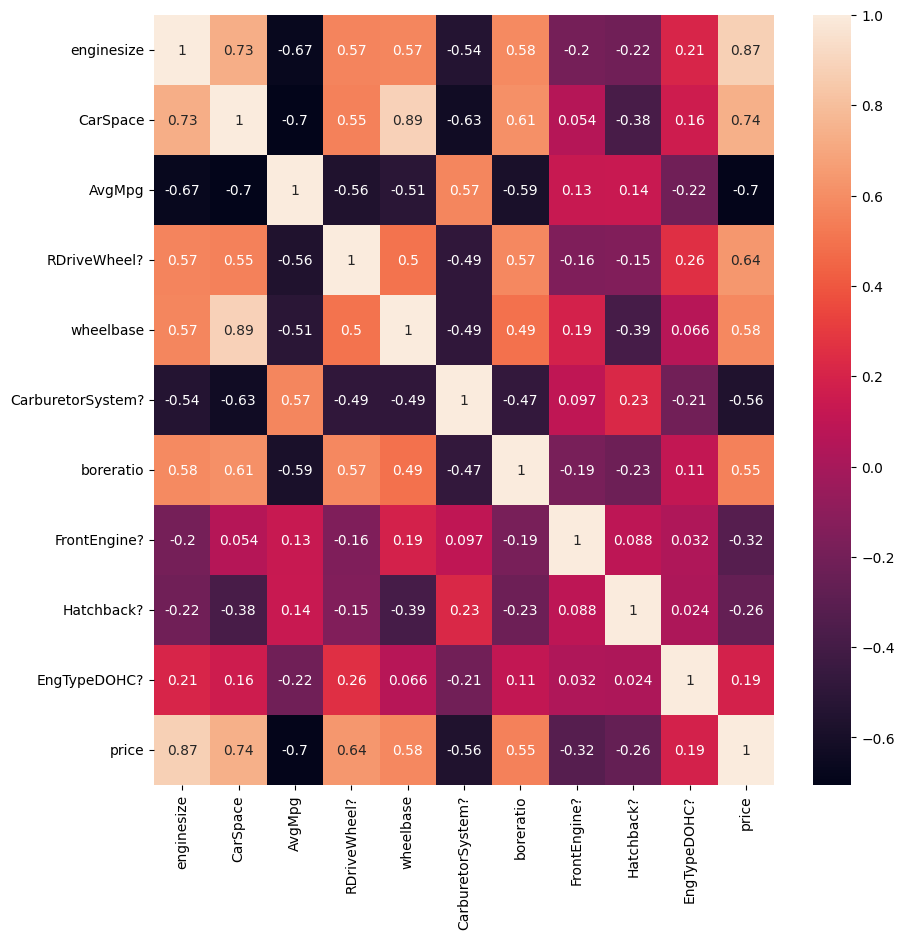

In [92]:
# Built a correlation matrix of selected variables
df_var = df.iloc[:, [16, 45, 46, 35, 9, 41, 18, 28, 30, 38, 25]]
corr_model_2 = df_var.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_model_2, annot = True)

<Axes: >

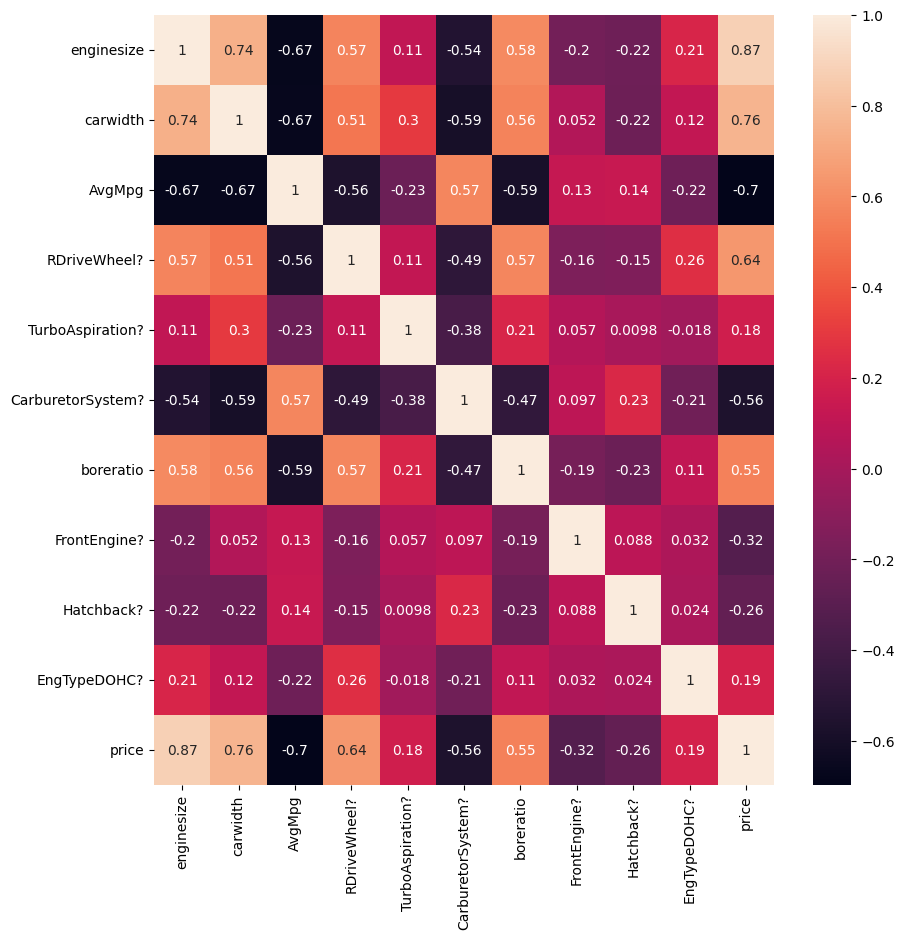

In [93]:
# CarSpace was replaced by Carwidth, because the latter one has more correlation with the price
# Wheelbase was replaced with TurboAspiration, because the former has strong correlation with Carwidth
df_var = df.iloc[:, [16, 11, 46, 35, 27, 41, 18, 28, 30, 38, 25]]
corr_model_3 = df_var.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_model_3, annot = True)

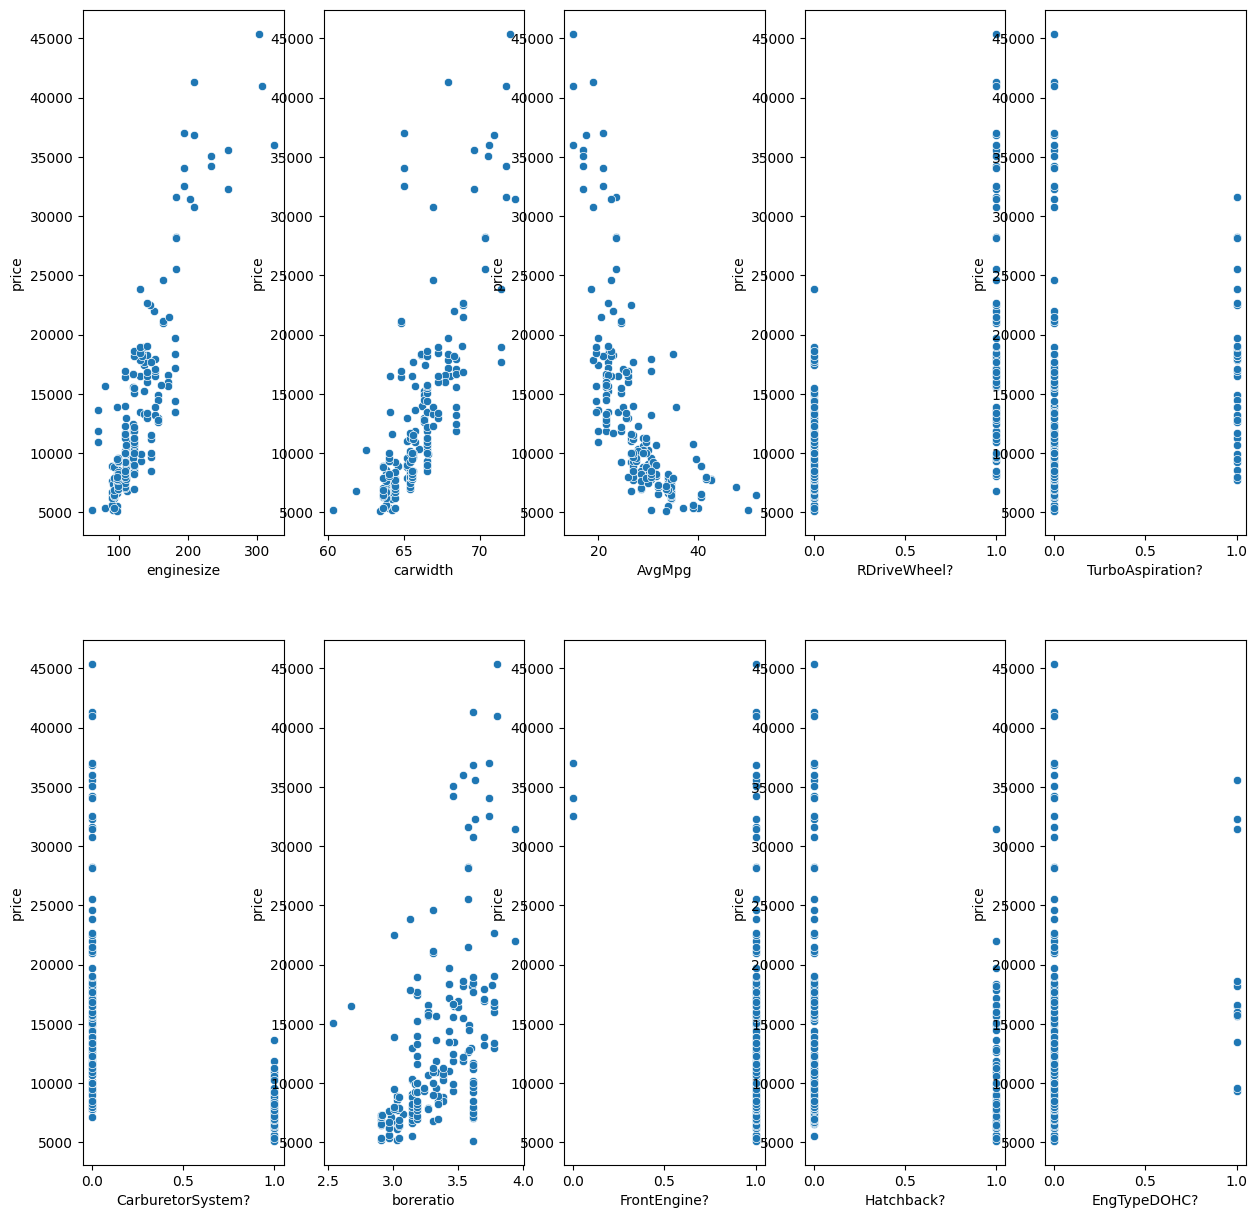

In [98]:
fig, axes = plt.subplots(2, 5, figsize = (15, 15))
target = 'price'

for indx, col in enumerate(df_var):
    if col != target:
        sns.scatterplot(df_var, x = col, y = target, ax = axes[indx // 5, indx % 5])

model marka, error in names, add qualitity features